# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('homepage_actions.csv')

df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

0.21857410881801126 0.41332739242520605
0.23649337410805302 0.4249826881144377


/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


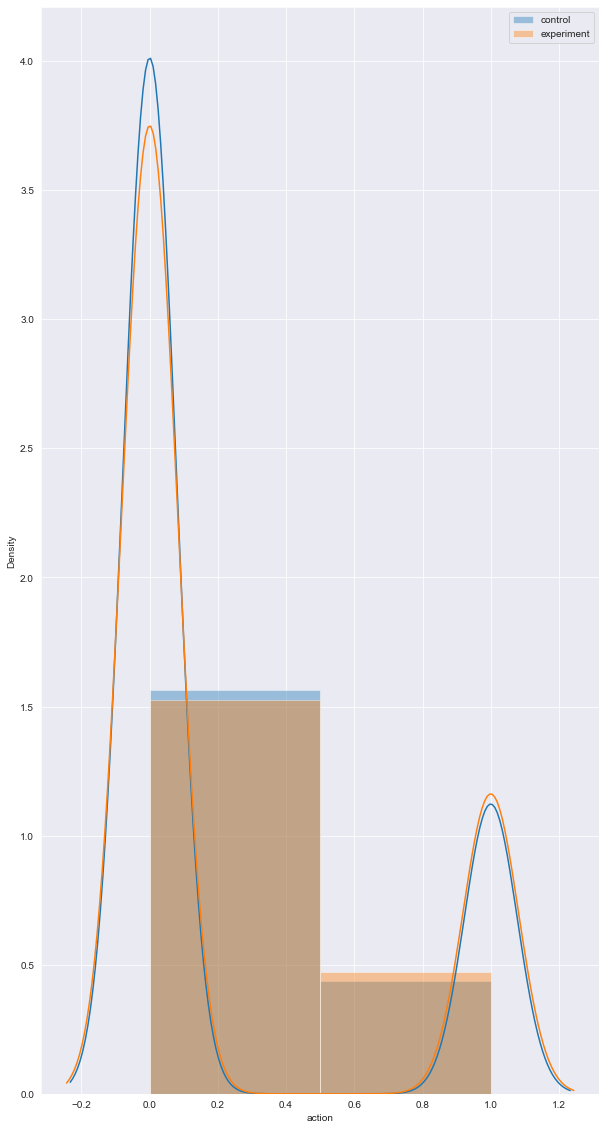

In [40]:
control = df.loc[df.group == 'control'].copy()
control.loc[control["action"]=='view', "action"] = 0
control.loc[control["action"]=='click', "action"] = 1

exp = df.loc[df.group == 'experiment'].copy()
exp.loc[exp["action"]=='view', "action"] = 0
exp.loc[exp["action"]=='click', "action"] = 1

print(control.action.mean(), control.action.std())
print(exp.action.mean(), exp.action.std())

fig, ax = plt.subplots(figsize=(10, 20))
sns.distplot(control.action, bins=2, label = 'control')
sns.distplot(exp.action, bins=2, label = 'experiment')
ax.legend()
plt.show()
# sns.distplot(control.action)
# sns.distplot(exp.action)

In [42]:
import scipy.stats as stats
stats.ttest_ind(control.action, exp.action, equal_var=False)

Ttest_indResult(statistic=-1.931244144507213, pvalue=0.053487773844403244)

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [ ]:
#Your code here

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
#Your code here

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.